import some libraries 


In [1]:
import numpy as np
import time
import cv2 
import glob
import os
import matplotlib.pyplot as plt

 Load yolo weights and cfg
 

In [2]:
weights_path = os.path.join("D:/2nd term/Digital image processing/Project","yolov3.weights")
config_path = os.path.join("D:/2nd term/Digital image processing/Project","yolov3.cfg")
print("loaded!")



loaded!


Load Neural net in cv2


In [3]:

net = cv2.dnn.readNetFromDarknet(config_path,weights_path)

Get Layers names


In [4]:

names = net.getLayerNames() 
names


('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

load the test image

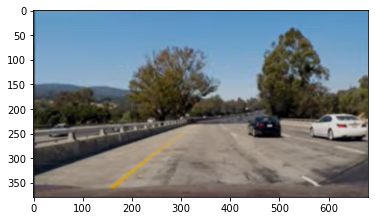

In [5]:
image_path = os.path.join("D:/2nd term/Digital image processing/Project","tst_img.png")
img = cv2.imread(image_path)
img_conv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_conv)

In [6]:
(H, W) = img.shape[ :2]
layers_names = [names[i - 1] for i in net.getUnconnectedOutLayers()]

In [7]:
layers_names

['yolo_82', 'yolo_94', 'yolo_106']

Run the inferences on the test image

In [8]:
blob = cv2.dnn.blobFromImage(img_conv, 1/255.0,(416,416), crop = False , swapRB = False)
net.setInput(blob)

#calc runtime algo
start_t = time.time()
layers_output = net.forward(layers_names)
print("A forward pass through yolov3 took{}".format(time.time() - start_t))

A forward pass through yolov3 took0.3931002616882324


In [9]:
layers_output

(array([[0.03848504, 0.02541414, 0.30860507, ..., 0.        , 0.        ,
         0.        ],
        [0.05257598, 0.03527593, 0.23808707, ..., 0.        , 0.        ,
         0.        ],
        [0.05028636, 0.02552763, 0.96149814, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9608487 , 0.9567224 , 0.41158092, ..., 0.        , 0.        ,
         0.        ],
        [0.9633822 , 0.96710503, 0.30799186, ..., 0.        , 0.        ,
         0.        ],
        [0.97044116, 0.9653013 , 0.8789532 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02374543, 0.02191778, 0.0571093 , ..., 0.        , 0.        ,
         0.        ],
        [0.01446746, 0.01889658, 0.30156076, ..., 0.        , 0.        ,
         0.        ],
        [0.02579288, 0.01836222, 0.09026168, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9734053 , 0.97970337, 0.04695531, ..., 0.        , 0.        ,
         0.        

In [10]:
boxes = []
confidences = []
classIDs = []

In [11]:
  for output in layers_output:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        
        if (confidence > 0.85):
            box = detection[:4]*np.array([W ,H,W ,H])
            bx , by , bw , bh = box.astype("int")
            
            x = int(bx - (bw/2))
            y = int(by - (bh/2))
            
            boxes.append([x , y , int(bw), int(bh)])
            confidences.append(float(confidence))
            classIDs.append(classID)
        

In [12]:
idxs = cv2.dnn.NMSBoxes(boxes , confidences , 0.8 , 0.8)

Reload Labels file


In [13]:
labels_path = os.path.join("D:/2nd term/Digital image processing/Project","coco.names")
labels = open(labels_path).read().strip().split("\n")

In [14]:
labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

Plot the bounding Boxes in the image

In [15]:
for i in idxs.flatten():
    (x , y) = [boxes[i][0] , boxes[i][1]]
    (w , h) = [boxes[i][2] , boxes[i][3]]
    
    cv2.rectangle(img_conv, (x,y), (x + w ,y + h), (0 , 255 , 255, 2))
    cv2.putText(img, "{}: {}".format(labels[classIDs[i]], confidences[i]) ,
        (x, y-5), cv2.FONT_HERSHEY_SIMPLEX,  0.5 , (0 , 0 , 255) , 2 )

Plotting resulting image

In [16]:
cv2.imshow("image", cv2.cvtColor(img_conv, cv2.COLOR_RGB2BGR))
    
cv2.waitKey(0)

-1